# Fake news Detection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import nltk
from sklearn.metrics import roc_curve, roc_auc_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Inserting fake and real dataset

In [ ]:
# df_fake = pd.read_csv("/content/sample_data/Fake.csv",engine='python',error_bad_lines=False)
# df_true = pd.read_csv("/content/sample_data/True.csv",engine='python',error_bad_lines=False)
df = pd.read_csv("/fake_news_dataset.csv",engine='python',encoding='utf-8',on_bad_lines="skip")

In [ ]:
df.head(5)

,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1.0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,Did they post their votes for Hillary already?,1.0,NaN,NaN,NaN,NaN,NaN
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1.0,NaN,NaN,NaN,NaN,NaN
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0.0,NaN,NaN,NaN,NaN,NaN
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df_true.head(5)

Inserting a column called "class" for fake and real news dataset to categories fake and true news.

In [ ]:
# df_fake["class"] = 0
# df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_fake.shape, df_true.shape

In [ ]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
# df_fake_manual_testing["class"] = 0
# df_true_manual_testing["class"] = 1

In [ ]:
# df_fake_manual_testing.head(10)

In [ ]:
# df_true_manual_testing.head(10)

In [ ]:
# df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
# df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
# df_marge = pd.concat([df_fake, df_true], axis =0 )
# df_marge.head(10)

In [ ]:
# df.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
df = df.drop(["Unnamed: 0", "title","Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8"], axis = 1)

In [ ]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1.0
1,Did they post their votes for Hillary already?,1.0
2,"Now, most of the demonstrators gathered last ...",1.0
3,A dozen politically active pastors came here f...,0.0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1.0


In [ ]:
df.dropna(subset=['label'], inplace=True)
df.isnull().sum()

text     11
label     0
dtype: int64

#### Randomly shuffling the dataframe

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,label
2369,FBI Director James Comey defied his boss s ins...,1.0
3691,The legendary anthropologist and expert on pri...,1.0
4405,"WASHINGTON — In the end, she checked every ...",0.0
8567,By now you ve probably heard about the remarks...,1.0
5337,"KARANGASEM, Indonesia (Reuters) - Nearly 135,0...",0.0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns
df['label'] = df['label'].astype(int)

In [ ]:
df.head()

,text,label
0,FBI Director James Comey defied his boss s ins...,1
1,The legendary anthropologist and expert on pri...,1
2,"WASHINGTON — In the end, she checked every ...",0
3,By now you ve probably heard about the remarks...,1
4,"KARANGASEM, Indonesia (Reuters) - Nearly 135,0...",0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# df["text"] = df["text"].apply(wordopt)

In [ ]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

# Function to preprocess df in the 'label' column
def preprocess_text(df):
    filter_sentence = []
    df = re.sub(r'[^\w\s]', '', str(df))  # Cleaning
    words = nltk.word_tokenize(df)  # Tokenization
    words = [w for w in words if not w in stop_words]  # Stopwords removal
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    return ' '.join(filter_sentence)

# Apply text preprocessing to the 'label' column
df['text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,text,label
0,FBI Director James Comey defied bos instructio...,1
1,The legendary anthropologist expert primate ma...,1
2,WASHINGTON In end checked every box Elegant un...,0
3,By probably heard remark Clueless star Fox New...,1
4,KARANGASEM Indonesia Reuters Nearly 135000 peo...,0


#### Defining dependent and independent variable as x and y

In [ ]:
x = df["text"]
y = df["label"]

#### Splitting the dataset into training set and testing set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9415022499134649

<Axes: >

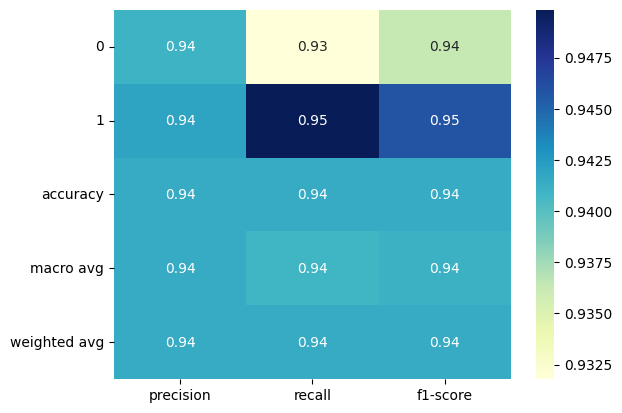

In [ ]:
clf_report=classification_report(y_test, pred_lr,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9439252336448598

<Axes: >

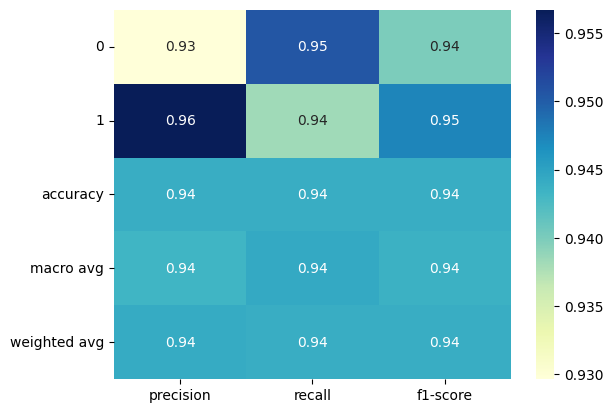

In [ ]:
clf_report=classification_report(y_test, pred_dt,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

###3. GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9328487365870544

<Axes: >

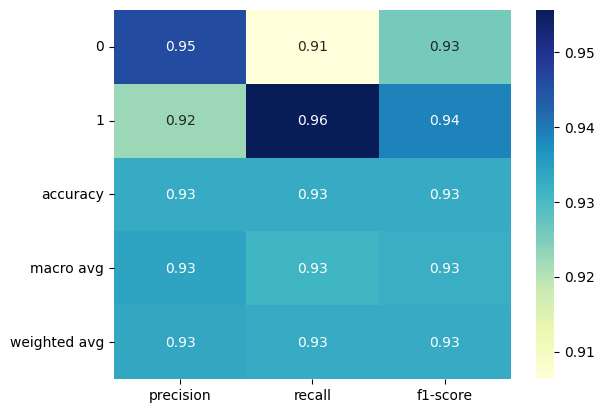

In [ ]:
clf_report=classification_report(y_test, pred_gbc,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.953963309103496

<Axes: >

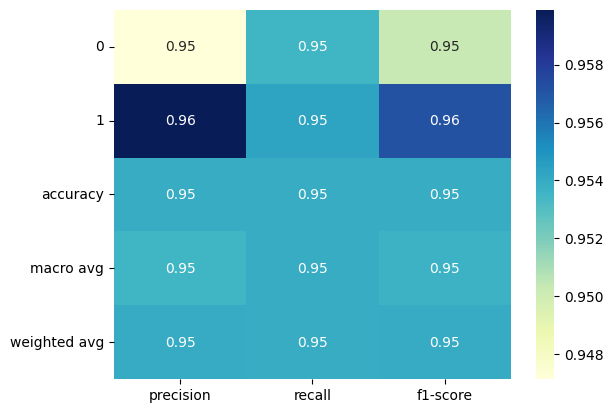

In [ ]:
clf_report=classification_report(y_test, pred_rfc,output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,cmap='YlGnBu')

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
# news = str(input())
# manual_testing(news)